**Gurleen Kaur - 102003138**

**Ishit Choudhary - 102003133**


### Importing Libraries and Uploading Document

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

In [ ]:
# Uploading the dataset
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['Turnover.csv']))

Saving Turnover.csv to Turnover (1).csv


In [ ]:
# Checking the dataset
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
# Checking information about all attributes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales                  14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#Preprocessing

In [ ]:
# Label Encoding Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['sales']=le.fit_transform(df2['sales'])
df2['salary']=le.fit_transform(df2['salary'])
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1


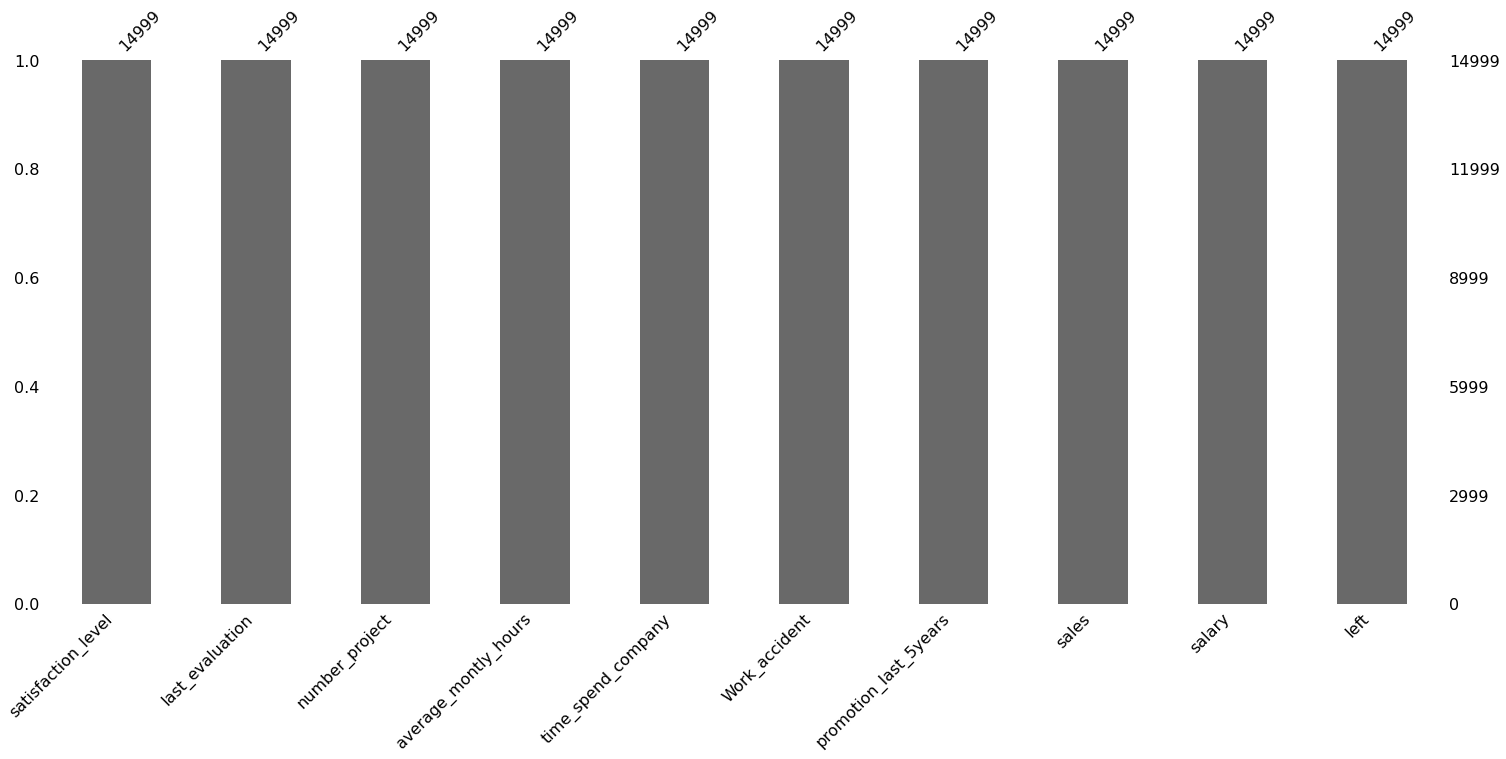

In [ ]:
# Checking for Null values
import missingno as msn
msn.bar(df2.iloc[:,:])

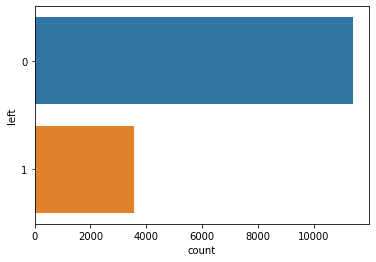

In [ ]:
# Checking for Class balancing
import seaborn as sns
sns.countplot(y=df2.iloc[:,-1],data=df2)

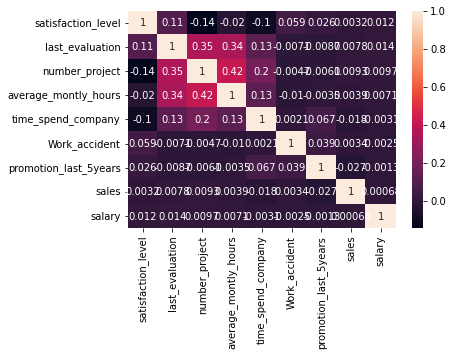

In [ ]:
# Checking correlation between input features
import seaborn as sns
sns.heatmap(df2.iloc[:,:-1].corr(),annot=True)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X=df2.iloc[:,:-1]
Y=df2.iloc[:,-1]

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)
X = x_smote
Y = y_smote

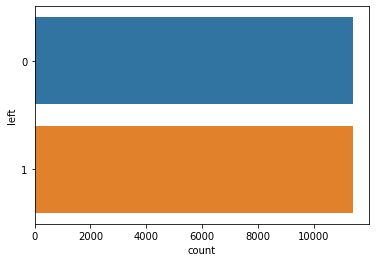

In [ ]:
sns.countplot(y=Y,data=X)

In [ ]:
# Scaling the input data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1



# Applying Multiple Logistic Regression of Third Degree with Ridge Regularization

In [ ]:
# Dividing data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X1=df2.iloc[:,0]
X2=df2.iloc[:,1]
X3=df2.iloc[:,2]
X4=df2.iloc[:,3]
X5=df2.iloc[:,4]
X6=df2.iloc[:,5]
X7=df2.iloc[:,6]
X8=df2.iloc[:,7]
X9=df2.iloc[:,8]
Y=df2.iloc[:,-1]

scaler=StandardScaler()

X0 =np.array(X1)
X0 = X0 ** 0

X1_1 =np.array(X1)
X1_2 = X1_1*(X1_1)
X1_3 = X1_2*(X1_1)

X2_1 = np.array(X2)
X2_2 = X2_1*(X2_1)
X2_3 = X2_2*(X2_1)

X3_1 =np.array(X3)
X3_1 = X3_1 / 10
X3_2 = X3_1*(X3_1)
X3_3 = X3_2*(X3_1)

X4_1 = np.array(X4)
X4_1 = X4_1 / 100
X4_2 = X4_1*(X4_1)
X4_3 = X4_2*(X4_1)

X5_1 =np.array(X5)
X5_1 = X5_1 / 10
X5_2 = X5_1*(X5_1)
X5_3 = X5_2*(X5_1)

X6_1 =np.array(X6)
X6_2 = X6_1*(X6_1)
X6_3 = X6_2*(X6_1)

X7_1 =np.array(X7)
X7_2 = X7_1*(X7_1)
X7_3 = X7_2*(X7_1)

X8_1 =np.array(X8)
X8_1 = X8_1 / 10
X8_2 = X8_1*(X8_1)
X8_3 = X8_2*(X8_1)

combined = np.transpose((X0, X1_1, X1_2, X1_3, X2_1, X2_2, X2_3, X3_1, X3_2, X3_3, X4_1, X4_2, X4_3, X5_1, X5_2, X5_3, X6_1, X6_2, X6_3, X7_1, X7_2, X7_3, X8_1, X8_2, X8_3))
df = pd.DataFrame(combined, columns =['X ^0', 'X1 ^1', 'X1 ^2', 'X1 ^3', 'X2 ^1', 'X2 ^2', 'X2 ^3', 'X3 ^1', 'X3 ^2', 'X3 ^3', 'X4 ^1', 'X4 ^2', 'X4 ^3', 'X5 ^1', 'X5 ^2', 'X5 ^3', 'X6 ^1', 'X6 ^2', 'X6 ^3', 'X7 ^1', 'X7 ^2', 'X7 ^3', 'X8 ^1', 'X8 ^2', 'X8 ^3'])
df.head()

,X ^0,X1 ^1,X1 ^2,X1 ^3,X2 ^1,X2 ^2,X2 ^3,X3 ^1,X3 ^2,X3 ^3,...,X5 ^3,X6 ^1,X6 ^2,X6 ^3,X7 ^1,X7 ^2,X7 ^3,X8 ^1,X8 ^2,X8 ^3
0,1.0,0.38,0.1444,0.054872,0.53,0.2809,0.148877,0.2,0.04,0.008,...,0.027,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.49,0.343
1,1.0,0.80,0.6400,0.512000,0.86,0.7396,0.636056,0.5,0.25,0.125,...,0.216,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.49,0.343
2,1.0,0.11,0.0121,0.001331,0.88,0.7744,0.681472,0.7,0.49,0.343,...,0.064,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.49,0.343
3,1.0,0.72,0.5184,0.373248,0.87,0.7569,0.658503,0.5,0.25,0.125,...,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.49,0.343
4,1.0,0.37,0.1369,0.050653,0.52,0.2704,0.140608,0.2,0.04,0.008,...,0.027,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.49,0.343


In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)
print(X_scaled)

[[ 0.         -0.93649469 -1.03587738 ...  0.39372503  0.22762005
   0.060747  ]
 [ 0.          0.75281433  0.71640716 ...  0.39372503  0.22762005
   0.060747  ]
 [ 0.         -2.02247906 -1.50364825 ...  0.39372503  0.22762005
   0.060747  ]
 ...
 [ 0.         -0.97671633 -1.062395   ...  0.74231612  0.76892352
   0.72667576]
 [ 0.         -2.02247906 -1.50364825 ...  0.74231612  0.76892352
   0.72667576]
 [ 0.         -0.97671633 -1.062395   ...  0.74231612  0.76892352
   0.72667576]]


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
#Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
def logistic_regression(n,alpha,X_train,lda):
    m,k=X_train.shape
    beta=np.zeros(k)
    for i in range(n):
        if(i%(int)(n/10)==0):
            print('loop:('+(str)(i)+'/'+(str)(n)+')')
        cost_gradient=np.zeros(k)
        z=X_train.dot(beta)
        predicted=1/(1+np.exp(-z))
        difference=predicted-Y_train
        for j in range(k):
            cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
        for j in range(k):
            beta[j]=beta[j]*(1-(alpha*lda/m))-(alpha/m)*cost_gradient[j]
    print(beta)
    return beta

In [ ]:
beta = logistic_regression(50000,0.0001,X_train,0.2)

loop:(0/50000)
loop:(5000/50000)
loop:(10000/50000)
loop:(15000/50000)
loop:(20000/50000)
loop:(25000/50000)
loop:(30000/50000)
loop:(35000/50000)
loop:(40000/50000)
loop:(45000/50000)
[ 0.         -0.27921238 -0.19917087 -0.13635173 -0.02175383  0.01853373
  0.05702845 -0.12056836  0.0345543   0.15625183  0.00173177  0.0528428
  0.10402097  0.14968889  0.01771468 -0.08183496 -0.08129741 -0.08129741
 -0.08129741 -0.03214658 -0.03214658 -0.03214658  0.02476669  0.02178334
  0.01995408]


# Predicting and Labelling

In [ ]:
Y_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
    if(Y_predict[i]>=0.5):
        Y_label[i]=1

# Performance Evaluation

In [ ]:
TP=0
TN=0
FP=0
FN=0
Y_test=np.array(Y_test).reshape(-1,1)
for i in range(len(Y_label)):
    if(Y_test[i]==1 and Y_label[i]==1):
        TP=TP+1
    if(Y_test[i]==1 and Y_label[i]==0):
        FN=FN+1
    if(Y_test[i]==0 and Y_label[i]==1):
        FP=FP+1
    if(Y_test[i]==0 and Y_label[i]==0):
        TN=TN+1
print(TP,TN,FP,FN)

888 2028 1400 184


In [ ]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print(precision_pos,recall_pos,f1_score_pos)
#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print(precision_neg,recall_neg,f1_score_neg)

0.3881118881118881 0.8283582089552238 0.5285714285714286
0.9168173598553345 0.5915985997666278 0.7191489361702128


In [ ]:
#Macro Average
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print(macro_precision,macro_recall,macro_f1_score)

0.6524646239836114 0.7099784043609259 0.6238601823708207


In [ ]:
#Weighted Average
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print(weighted_precision,weighted_recall,weighted_f1_score)

0.7908679674755624 0.648 0.673749138804458


# Function Plots

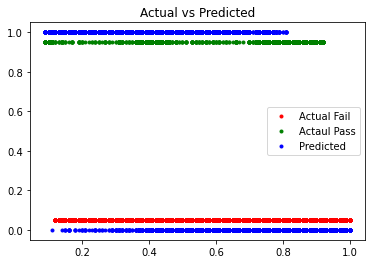

In [ ]:
import matplotlib.pyplot as plt
accX = [10000]
accY = [10000]
rejX = [10000]
rejY = [10000]
plt.show()
for point in np.array(df2):
    if point[-1]==1:
        rejX.append(point[0])
        rejY.append(point[1])
    else:
        accX.append(point[0])
        accY.append(point[1])
accX[0]=accX[1]
accY[0]=accY[1]
rejX[0]=rejX[1]
rejY[0]=rejY[1]
Y_predict=1/(1+np.exp(-(X_scaled.dot(beta))))
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
    if(Y_predict[i]>=0.55):
        Y_label[i]=1
plt.scatter(accX,np.zeros(len(accX))+0.05,color='r',marker='.')
plt.scatter(rejX,np.ones(len(rejX))-0.05,color='g',marker='.')
plt.scatter(X1_1,Y_label,color='b',marker='.')
plt.title('Actual vs Predicted')
plt.legend(['Actual Fail','Actaul Pass','Predicted'])
plt.show()